# UP-Running-Pandas

## Basic file json, csv handling. 

In [2]:
# python lib for data manipulation
# provides efficient data structures
# provides utilities for data cleaning, aggregation, visualization 

# What is Jupyter?
#     Python library for web based python interactive documents
#     Widely used in Data Science for prototyping code
#     Allows the user to explore, process and analyze data in a convenient manner
#     Files that end in .ipynb and hosted in a jupyter notebook server and can be modified and executed to run python code via a web application.

# $ pip install pandas
# $ pip install jupyter
# $ cd /path/to/your/directory
# $ jupyter notebook .


# Data Frame
#     A two-dimensional object used to represent tabular data structure. It is a spreadsheet like structure where data represented as a series of rows and columns.
#     Characteristics of a Data Frame
#         Mutable / Modifiable 
#         Indexed Based 
#         Class
#     Usecases for Data Frames
#         Python data representation from other medium
#         Exploratory data analysis
#         Data aggregation and grouping
#         Data transformation for feature engineering
#         Machine Learning datasets

# Classic Data Representation Media -> json, csv

# Reasons to Wrangle Your Data
    # Filter: Extract Specific Rows with Specific Columns
    # Clean: Pre-process data for further analysis
    # Summarize: Aggregate data and derive other information

In [3]:


import json
import csv

f = open("testdata/example-1.json", mode="r")
example1_json = json.load(f)

print(example1_json[1]["Column 1"])

with open("testdata/example-2.json", "r") as fp:
    example2_json = json.load(fp)

print(example2_json["Column 1"])

with open("testdata/example-1.csv", mode="r") as csv_fp:
    csv_reader = csv.DictReader(csv_fp)

    for row in csv_reader:
        print(row)

3
{'0': 1, '1': 3, '2': 5}
{'Branch': 'Branch A', 'Date': 'January 1', 'Amount': '500.00'}
{'Branch': 'Branch B', 'Date': 'January 2', 'Amount': '250.00'}
{'Branch': 'Branch A', 'Date': 'January 3', 'Amount': '300.00'}


## Importing pandas, Column, index operations

### Basic Demo

In [4]:
# Importing pandas
import pandas as pd

df_one = pd.DataFrame(columns=["col1", "col2"])
print(df_one)
print()

# Rename columns 
df_one.columns = ["First","Second"]
print(df_one)
print()

# Creating new Data frame with data
new_data = {
    "First": [1,2,"foo"],
    "Second": [3,4,"bar"]
}
df_two = pd.DataFrame(new_data)
print(df_two)
print()

# Adding Data frame To gather (row wise)
df_combined = pd.concat([df_one, df_two])
print(df_combined)
print()

# trying with df_one with data will pose index problem so we need to reset it.
data_for_one = {
    "First": [5,6,"Hello"],
    "Second": [7,8,"World"]
}
df_one = pd.DataFrame(data_for_one)
df_combined = pd.concat([df_one, df_two])
print(df_combined)
print()

df_combined.reset_index(drop=True, inplace=True)
print(df_combined)
print()

# Adding DataFrames column wise
col_data = {
    "Third": ["a","b","c"]
}
df_three = pd.DataFrame(col_data)
df_combined = pd.concat([df_combined, df_three], axis=1)
print(df_combined)
print()

Empty DataFrame
Columns: [col1, col2]
Index: []

Empty DataFrame
Columns: [First, Second]
Index: []

  First Second
0     1      3
1     2      4
2   foo    bar

  First Second
0     1      3
1     2      4
2   foo    bar

   First Second
0      5      7
1      6      8
2  Hello  World
0      1      3
1      2      4
2    foo    bar

   First Second
0      5      7
1      6      8
2  Hello  World
3      1      3
4      2      4
5    foo    bar

   First Second Third
0      5      7     a
1      6      8     b
2  Hello  World     c
3      1      3   NaN
4      2      4   NaN
5    foo    bar   NaN



In [5]:
import pandas as pd

column_names = [
    "Date of Transaction",
    "Branch Name",
    "Amount of Sales",
    "Is Active"
]

df_primary = pd.DataFrame(columns=column_names)

df_primary

,Date of Transaction,Branch Name,Amount of Sales,Is Active


In [6]:
default_data =  {
    "Date of Transaction": ["Jan 1", "Jan 2"],
    "Branch Name": ["B1", "B2"],
    "Amount of Sales": [100.0, 110.2],
    "Is Active": [True, False]
}

df_default_data = pd.DataFrame(default_data)
df_default_data

,Date of Transaction,Branch Name,Amount of Sales,Is Active
0,Jan 1,B1,100.0,True
1,Jan 2,B2,110.2,False


In [7]:
df_primary = pd.concat([df_primary, df_default_data])

df_primary

,Date of Transaction,Branch Name,Amount of Sales,Is Active
0,Jan 1,B1,100.0,True
1,Jan 2,B2,110.2,False


In [8]:
new_data = {
    "Date of Transaction": ["Jan 3", "Jan 4"],
    "Branch Name": ["B3", "B4"],
    "Amount of Sales": [500.00, 600.00],
    "Is Active": [True, True]
}
df_new = pd.DataFrame(new_data)
df_new

,Date of Transaction,Branch Name,Amount of Sales,Is Active
0,Jan 3,B3,500.0,True
1,Jan 4,B4,600.0,True


In [9]:
df_primary = pd.concat([df_primary, df_new])

df_primary

,Date of Transaction,Branch Name,Amount of Sales,Is Active
0,Jan 1,B1,100.0,True
1,Jan 2,B2,110.2,False
0,Jan 3,B3,500.0,True
1,Jan 4,B4,600.0,True


In [10]:
df_primary.reset_index(drop=True, inplace=True)
df_primary

,Date of Transaction,Branch Name,Amount of Sales,Is Active
0,Jan 1,B1,100.0,True
1,Jan 2,B2,110.2,False
2,Jan 3,B3,500.0,True
3,Jan 4,B4,600.0,True


### Programmatically Representing Data with Pandas

In [11]:
import pandas as pd

In [12]:
df_json = pd.read_json("testdata/example-2.json")
df_json

,Column 1,Column 2
0,1,2
1,3,4
2,5,6


In [13]:
json_string = df_json.to_json()
json_string

'{"Column 1":{"0":1,"1":3,"2":5},"Column 2":{"0":2,"1":4,"2":6}}'

In [14]:
# First row will be header by default.  
df_csv = pd.read_csv("testdata/example-1.csv")
df_csv

,Branch,Date,Amount
0,Branch A,January 1,500.0
1,Branch B,January 2,250.0
2,Branch A,January 3,300.0


In [15]:
df_csv_no_header = pd.read_csv("testdata/example-1.csv", header=None)
df_csv_no_header

,0,1,2
0,Branch,Date,Amount
1,Branch A,January 1,500.00
2,Branch B,January 2,250.00
3,Branch A,January 3,300.00


In [16]:
# Make sure to supply index = None to remove indexes 

df_csv_no_header.to_csv("testdata/csv_no_header.csv", index=None)


### Large DataFrame Ops

In [17]:
import pandas as pd
df_yeast = pd.read_csv("testdata/yeast.csv", header=None)
print(len(df_yeast))
df_yeast

1484


,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [18]:
# head() and tail() give 5 rows 
df_yeast.head()

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [19]:
df_yeast.head(2)

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT


In [20]:
# Examining the n bottom records with tail()

df_yeast.tail(3)

,0,1,2,3,4,5,6,7,8,9
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,G6PD_YEAST,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


In [21]:
# Filtering Columns by Column Name 
df_yeast[[0,1,9]]

,0,1,9
0,ADT1_YEAST,0.58,MIT
1,ADT2_YEAST,0.43,MIT
2,ADT3_YEAST,0.64,MIT
3,AAR2_YEAST,0.58,NUC
4,AATM_YEAST,0.42,MIT
...,...,...,...
1479,YUR1_YEAST,0.81,ME2
1480,ZIP1_YEAST,0.47,NUC
1481,ZNRP_YEAST,0.67,ME2
1482,ZUO1_YEAST,0.43,NUC


In [22]:
# Using iloc to Select Data
# Row Range i:n Column Range i:n df_data.iloc[row_indexer, column_indexer]

# 1 - Selecting Rows by Index
df_yeast.iloc[0:4]

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC


In [23]:
# 2 - Selecting Columns by Index
df_yeast.iloc[0:4, 0:3]

,0,1,2
0,ADT1_YEAST,0.58,0.61
1,ADT2_YEAST,0.43,0.67
2,ADT3_YEAST,0.64,0.62
3,AAR2_YEAST,0.58,0.44


In [24]:
# 3 - Selecting Rows using a Boolean Indexer
# All rows where column 9’s value is equal to MIT
df_yeast[df_yeast[9] == 'MIT']

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
6,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1462,ACP_YEAST,0.52,0.53,0.58,0.69,0.5,0.0,0.50,0.22,MIT
1468,YMC1_YEAST,0.39,0.58,0.47,0.18,0.5,0.0,0.48,0.22,MIT
1469,YMC2_YEAST,0.38,0.47,0.47,0.18,0.5,0.0,0.44,0.26,MIT
1470,YME1_YEAST,0.63,0.57,0.50,0.48,0.5,0.0,0.51,0.22,MIT


In [25]:
# 4 - Selecting Rows using a Boolean Indexer
# All rows where column 1’s value is greater than or equal to 0.5
df_yeast[df_yeast[1] >= 0.5]

,0,1,2,3,4,5,6,7,8,9
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
5,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,ABC1_YEAST,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1475,YP53_YEAST,0.71,0.50,0.50,0.18,0.5,0.0,0.46,0.22,CYT
1476,YPT7_YEAST,0.61,0.48,0.54,0.25,0.5,0.0,0.50,0.22,CYT
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2


In [26]:
# 5 - Replace Values
# Assign “Hello World” to column 0 of all rows whose column 9 value is equal to MIT
df_yeast.iloc[df_yeast[9] == 'MIT', 0] = "HelloWorld"
df_yeast

,0,1,2,3,4,5,6,7,8,9
0,HelloWorld,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,HelloWorld,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,HelloWorld,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,HelloWorld,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [27]:
# Describing Your Data
# only numeric columns only
# provide is statistical properties
df_yeast.describe()

,1,2,3,4,5,6,7,8
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [28]:
# What is Correlation?
# Look for columns that are redundant
# Change of value in one column yields an almost constant change in another
# Pairs have either high (closer to 1) or low (closer to -1) correlation scores
df_yeast.iloc[0:100,1:5].corr()

,1,2,3,4
1,1.000000,0.666362,-0.200970,0.113574
2,0.666362,1.000000,-0.297513,0.164686
3,-0.200970,-0.297513,1.000000,0.003798
4,0.113574,0.164686,0.003798,1.000000


In [29]:
# Data Wrangling
# - Read a CSV file and take a quick peek 
# - Use various iloc approaches
# - Derive properties of our data
df_phoneprices = pd.read_csv("testdata/phoneprices.csv")
df_phoneprices


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [30]:
df_phoneprices[["battery_power", "blue", "clock_speed"]]

,battery_power,blue,clock_speed
0,842,0,2.2
1,1021,1,0.5
2,563,1,0.5
3,615,1,2.5
4,1821,1,1.2
...,...,...,...
1995,794,1,0.5
1996,1965,1,2.6
1997,1911,0,0.9
1998,1512,0,0.9


In [31]:
df_phoneprices.iloc[0:4]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [32]:
df_phoneprices.iloc[0:4, [0,2]]

,battery_power,clock_speed
0,842,2.2
1,1021,0.5
2,563,0.5
3,615,2.5


In [33]:
df_phoneprices[df_phoneprices["price_range"] == 1]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
18,1131,1,0.5,1,11,0,49,0.6,101,5,...,658,878,1835,19,13,16,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,206,1167,2216,9,5,6,1,0,0,1
1986,1139,1,0.9,1,6,1,58,0.5,161,2,...,742,999,1850,9,4,8,1,0,0,1
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1


In [34]:
df_phoneprices.iloc[df_phoneprices["price_range"] == 1, 20] = "cheap"
df_phoneprices

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,cheap
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [35]:
df_phoneprices.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [36]:
df_phoneprices = pd.read_csv("testdata/phoneprices.csv")

df_phoneprices.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


# Cleaning Data with Pandas

In [37]:
# Data Cleaning
    # Data cleaning is the process of correcting or eliminating incorrect, missing, duplicate, and corrupt data from any given dataset
# Data Cleaning Process
    # Data importing, merging, and exploration
    # Data filtering
    # Data cleaning and transformation
# Introduction to Pandas
    # Open-source Python library developed in 2008
    # Widely used for data science, data analysis, and machine learning tasks
    # Built on top of the NumPy library
    # Series and DataFrame are the two main data structures in Pandas

In [38]:
import pandas as pd

In [39]:
hotel_df = pd.read_csv("testdata/hotel_bookings.csv")
print(f"The dataset contains {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns")

The dataset contains 119390 rows and 32 columns


In [40]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [41]:
# To display all coulumns Default = 20
pd.set_option("display.max_columns", None)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [42]:
# Mising data, data types 
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [43]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [44]:
# What Is Missing Data?
# Missing data occurs when values are simply absent or contain NaN (not a number) for any feature or column in a given dataset. This will cause issues with many machine learning algorithms.
# Action to be taken 
    # Remove Rows and Columns
    # Impute with Mean/Median
    # Impute with Mode (catogorical entry)
    # Impute with Forward Fill

# Finding missing data on each columns 
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [45]:
# Percentages of missing values
(hotel_df.isnull().sum()/len(hotel_df))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [46]:
# 94 % values in company column is missing.
hotel_df.drop("company", inplace=True, axis=1)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [47]:
# unique Values in children 
hotel_df["children"].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [48]:
# Fill up 0 in missing children
hotel_df.children = hotel_df.children.fillna(0)
hotel_df["children"].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [49]:
# 
hotel_df["country"].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [50]:
# dropping all rows with missing values in the country feature
hotel_df = hotel_df.dropna(subset=["country"])
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [51]:
# Need index reset to as we have removed rows 
hotel_df.reset_index(drop=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
118898,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
118899,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
118900,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [52]:
hotel_df.agent.value_counts()

agent
9.0      31960
240.0    13871
1.0       7191
14.0      3639
7.0       3539
         ...  
70.0         1
93.0         1
54.0         1
497.0        1
59.0         1
Name: count, Length: 332, dtype: int64

In [53]:
hotel_df.agent.nunique()

332

In [54]:
# agent is diverse and we dont want to fill those with mean or top 
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16006
days_in_waiting_list                  0


In [55]:
# total number of duplicates in the dataset
hotel_df.duplicated().sum()

31965

In [56]:
# extract the dataframe containing the duplicate values
hotel_df.loc[hotel_df.duplicated(), :]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [57]:
# Drop duplicates
hotel_df.drop_duplicates(inplace=True, keep="first")
hotel_df.reset_index(drop=True, inplace=True)

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/3073617303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop_duplicates(inplace=True, keep="first")


In [58]:
hotel_df.shape

(86937, 31)

In [59]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86932,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
86933,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
86934,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
86935,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [60]:
# Datetime manipulation to make it proper Data Type
hotel_df.reservation_status_date = pd.to_datetime(hotel_df["reservation_status_date"])
hotel_df.info()

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/2646556236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.reservation_status_date = pd.to_datetime(hotel_df["reservation_status_date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86937 entries, 0 to 86936
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86937 non-null  object        
 1   is_canceled                     86937 non-null  int64         
 2   lead_time                       86937 non-null  int64         
 3   arrival_date_year               86937 non-null  int64         
 4   arrival_date_month              86937 non-null  object        
 5   arrival_date_week_number        86937 non-null  int64         
 6   arrival_date_day_of_month       86937 non-null  int64         
 7   stays_in_weekend_nights         86937 non-null  int64         
 8   stays_in_week_nights            86937 non-null  int64         
 9   adults                          86937 non-null  int64         
 10  children                        86937 non-null  float64       
 11  ba

In [61]:
# get year, month and day
hotel_df["reservation_status_year"] = hotel_df["reservation_status_date"].dt.year
hotel_df["reservation_status_month"] = hotel_df["reservation_status_date"].dt.month
hotel_df["reservation_status_day"] = hotel_df["reservation_status_date"].dt.day
hotel_df.head()

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/195394980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["reservation_status_year"] = hotel_df["reservation_status_date"].dt.year
/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/195394980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["reservation_status_month"] = hotel_df["reservation_status_date"].dt.month
/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/195394980.py:4: SettingWith

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [62]:
#week of year, day of week
hotel_df.loc[:,"res_day_of_week"] = hotel_df["reservation_status_date"].dt.dayofweek
hotel_df

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/1587867640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.loc[:,"res_day_of_week"] = hotel_df["reservation_status_date"].dt.dayofweek


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2,3
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2,3
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,7,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86932,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,9,6,2
86933,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,9,7,3
86934,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,9,7,3
86935,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,9,7,3


In [63]:
# Illogical Values
(hotel_df.adults == 0).sum()

380

In [64]:
#Dropping illogical values where adults == 0 
hotel_df.drop(hotel_df[hotel_df["adults"] == 0].index, inplace=True)

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/4061789819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.drop(hotel_df[hotel_df["adults"] == 0].index, inplace=True)


In [65]:
(hotel_df["adults"]==0).sum()

0

In [66]:
hotel_df.reset_index(drop=True, inplace=True)
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,7,1,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2,3
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,7,2,3
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,7,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,9,6,2
86553,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,9,7,3
86554,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,9,7,3
86555,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,9,7,3


In [67]:
# Correlation Analysis
# Correlation analysis is a statistical technique used to examine the strength and direction of the relationship between two or more variables. It involves analyzing the degree to which changes in one variable are associated with changes in another variable.

# Correlation Coefficient
# A numerical measure of the strength and direction of the relationship between two variables.

# Popular Correlation Coefficients

# Pearson Correlation Coefficient
# • Used for continuous data
# • Measures the strength of linear relationship between two variables
# • Sensitive to outliers
# vs. Spearman Correlation Coefficient
# • Used for ordinal or ranked data
# • Measures the strength of a monotonic relationship between two variables which can be linear or non-linear
# • More robust to outliers

# Correlation analysis can identify variables that are highly correlated to each other, which may indicate that one variable is redundant and can be removed from the dataset.

# But Why Remove One Variable?
# Multicollinearity - When two independent variables are highly correlated to each other in a regression model
# Multicollinearity can make it difficult to estimate the coefficients of the independent model
# Removing variables can simplify dataset and reduce noise and redundancy

In [68]:
# Dealing with categorical data - Label encoding vs one hot encoding
# In label encoding, each unique category in a categorical variable is assigned a numerical label, typically starting from 0, 1, 2, and so on.
# In one-hot encoding, a new binary feature is created for each category, and the value of that feature is set to 1 if the observation belongs to that category, and 0 otherwise.

In [69]:
cat_cols = [col for col in hotel_df.columns if hotel_df[col].dtype == "object"]
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [70]:
cat_df = hotel_df[cat_cols]
cat_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
86552,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
86553,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
86554,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
86555,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [71]:
#Printing uniq value
for col in cat_df.columns:
    print(f"{col}: \n {cat_df[col].unique()}\n")

hotel: 
 ['Resort Hotel' 'City Hotel']

arrival_date_month: 
 ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [72]:
# Manually map arrival month.
month_map = {
    "January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12
    }
cat_df["arrival_date_month"] = cat_df["arrival_date_month"].map(month_map)
cat_df

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/602579234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["arrival_date_month"] = cat_df["arrival_date_month"].map(month_map)


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,7,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,7,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,7,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
86552,City Hotel,8,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
86553,City Hotel,8,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
86554,City Hotel,8,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
86555,City Hotel,8,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [73]:
# country and hotel features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# label encoding country

cat_df["country"] = le.fit_transform(cat_df["country"])

# label encoding hotel

cat_df["hotel"] = le.fit_transform(cat_df["hotel"])

/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/3245167416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["country"] = le.fit_transform(cat_df["country"])
/var/folders/ct/qkpqtvvd091dtvx493j4dz5r0000gq/T/ipykernel_26301/3245167416.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["hotel"] = le.fit_transform(cat_df["hotel"])


In [74]:
cat_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,1,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,1,7,BB,135,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,1,7,BB,59,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,1,7,BB,59,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,1,7,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
86552,0,8,BB,15,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
86553,0,8,BB,56,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
86554,0,8,BB,43,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
86555,0,8,BB,59,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [75]:
#one-hot encoding
cat_df = pd.get_dummies(data=cat_df, columns=["meal", "market_segment", "distribution_channel",
                                             "reserved_room_type", "assigned_room_type", "customer_type",
                                             "deposit_type", "reservation_status"])

In [76]:
cat_df

,hotel,arrival_date_month,country,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,1,7,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
1,1,7,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
2,1,7,59,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3,1,7,59,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
4,1,7,59,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,0,8,15,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
86553,0,8,56,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
86554,0,8,43,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
86555,0,8,59,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False


In [77]:
# removing numerical from origin Data Frame
hotel_df = hotel_df.drop(columns=cat_cols, axis=1)

In [78]:
hotel_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0,0.00,0,0,2015-07-01,2015,7,1,2
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0,0.00,0,0,2015-07-01,2015,7,1,2
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,0,75.00,0,0,2015-07-02,2015,7,2,3
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02,2015,7,2,3
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03,2015,7,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06,2017,9,6,2
86553,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2,2017-09-07,2017,9,7,3
86554,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4,2017-09-07,2017,9,7,3
86555,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0,2017-09-07,2017,9,7,3


In [79]:
final_df = pd.concat([hotel_df, cat_df], axis=1)
final_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week,hotel,arrival_date_month,country,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0,0.00,0,0,2015-07-01,2015,7,1,2,1,7,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0,0.00,0,0,2015-07-01,2015,7,1,2,1,7,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,0,75.00,0,0,2015-07-02,2015,7,2,3,1,7,59,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02,2015,7,2,3,1,7,59,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03,2015,7,3,4,1,7,59,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06,2017,9,6,2,0,8,15,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,

## Correlation Analysis

In [80]:
# Correlation Analysis

corr_matrix = final_df.corr().abs()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week,hotel,arrival_date_month,country,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,1.000000,0.182933,0.087449,0.001180,0.005381,0.060386,0.083838,0.081074,0.066124,0.020744,0.089305,0.050999,0.050608,0.093669,0.043246,0.004578,0.125962,0.184113,0.122370,0.034766,0.009340,0.099776,0.011826,0.122361,0.069262,0.003420,0.097385,0.039691,0.000160,0.004387,0.061847,0.018203,0.008811,0.030720,0.075168,0.112626,0.002860,0.124466,0.210774,0.007783,0.079974,0.118183,0.007906,0.149952,0.008907,0.044359,0.005323,0.011108,0.028686,0.001508,0.010914,0.029534,0.024513,0.001066,0.074359,0.024815,0.032891,0.042519,0.026115,0.013309,0.010418,0.015896,0.037137,0.022427,0.005504,0.048876,0.031168,0.128014,0.109269,0.156617,0.165237,0.002606,0.970963,1.000000,0.175584
lead_time,0.182933,1.000000,0.138387,0.101223,0.009439,0.235428,0.312606,0.141754,0.022918,0.003702,0.146763,0.005628,0.076486,0.080710,0.025703,0.132260,0.018432,0.085673,0.032062,0.113301,0.076291,0.057707,0.001008,0.025164,0.037349,0.106253,0.095810,0.064420,0.013080,0.138679,0.054920,0.008200,0.045107,0.069017,0.162540,0.141971,0.193578,0.132007,0.004427,0.004394,0.129726,0.132654,0.031939,0.193995,0.005049,0.024460,0.033427,0.001647,0.016797,0.025993,0.025027,0.000036,0.001893,0.007756,0.041851,0.014206,0.004921,0.039835,0.011599,0.030116,0.008252,0.005195,0.008984,0.019815,0.003166,0.065756,0.025530,0.162580,0.151732,0.168096,0.167832,0.026667,0.193604,0.182933,0.033650
arrival_date_year,0.087449,0.138387,1.000000,0.513891,0.009932,0.005044,0.003834,0.037800,0.042053,0.023090,0.024346,0.054025,0.028222,0.009169,0.020022,0.027753,0.176448,0.038919,0.064083,0.909374,0.959861,0.418558,0.009800,0.005554,0.077939,0.499462,0.130414,0.075154,0.030937,0.014351,0.117270,0.015874,0.018841,0.018670,0.035283,0.013179,0.060272,0.108291,0.134863,0.008488,0.035708,0.025056,0.016086,0.040770,0.013421,0.056915,0.037962,0.017394,0.049397,0.020975,0.010392,0.014122,0.000758,0.014702,0.020369,0.059257,0.000346,0.001145,0.004175,0.007263,0.003083,0.004830,0.004667,0.006125,0.006002,0.168153,0.017444,0.170529,0.094544,0.018924,0.019296,0.001758,0.091509,0.087449,0.011802
arrival_date_week_number,0.001180,0.101223,0.513891,1.000000,0.092946,0.026872,0.028235,0.025066,0.013653,0.013597,0.038601,0.006453,0.020898,0.012378,0.018117,0.013215,0.098556,0.008868,0.046004,0.164030,0.461224,0.802035,0.031997,0.019180,0.019122,0.995061,0.023499,0.004374,0.012382,0.033360,0.038739,0.010381,0.006710,0.011887,0.005950,0.009963,0.013235,0.042273,0.029762,0.001818,0.015207,

In [81]:
#  Setting threshold
threshold = 0.85

# Corr.matrix contains 1 in diagonal and upper value and lower values would be same
# So we are using np.one to create array on 1 with same shape
# Then we supply it ot triu with k=1 so it will make diagonal and below values false and upper true with astype(bool)
# Then we feed that to corr_matrix

import numpy as np

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

upper

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,reservation_status_year,reservation_status_month,reservation_status_day,res_day_of_week,hotel,arrival_date_month,country,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
is_canceled,NaN,0.182933,0.087449,0.001180,0.005381,0.060386,0.083838,0.081074,0.066124,0.020744,0.089305,0.050999,0.050608,0.093669,0.043246,0.004578,0.125962,0.184113,0.122370,0.034766,0.009340,0.099776,0.011826,0.122361,0.069262,0.003420,0.097385,0.039691,0.000160,0.004387,0.061847,0.018203,0.008811,0.030720,0.075168,0.112626,0.002860,0.124466,0.210774,0.007783,0.079974,0.118183,0.007906,0.149952,0.008907,0.044359,0.005323,0.011108,0.028686,0.001508,0.010914,0.029534,0.024513,0.001066,0.074359,0.024815,0.032891,0.042519,0.026115,0.013309,0.010418,0.015896,0.037137,0.022427,0.005504,0.048876,0.031168,0.128014,0.109269,0.156617,0.165237,0.002606,0.970963,1.000000,0.175584
lead_time,NaN,NaN,0.138387,0.101223,0.009439,0.235428,0.312606,0.141754,0.022918,0.003702,0.146763,0.005628,0.076486,0.080710,0.025703,0.132260,0.018432,0.085673,0.032062,0.113301,0.076291,0.057707,0.001008,0.025164,0.037349,0.106253,0.095810,0.064420,0.013080,0.138679,0.054920,0.008200,0.045107,0.069017,0.162540,0.141971,0.193578,0.132007,0.004427,0.004394,0.129726,0.132654,0.031939,0.193995,0.005049,0.024460,0.033427,0.001647,0.016797,0.025993,0.025027,0.000036,0.001893,0.007756,0.041851,0.014206,0.004921,0.039835,0.011599,0.030116,0.008252,0.005195,0.008984,0.019815,0.003166,0.065756,0.025530,0.162580,0.151732,0.168096,0.167832,0.026667,0.193604,0.182933,0.033650
arrival_date_year,NaN,NaN,NaN,0.513891,0.009932,0.005044,0.003834,0.037800,0.042053,0.023090,0.024346,0.054025,0.028222,0.009169,0.020022,0.027753,0.176448,0.038919,0.064083,0.909374,0.959861,0.418558,0.009800,0.005554,0.077939,0.499462,0.130414,0.075154,0.030937,0.014351,0.117270,0.015874,0.018841,0.018670,0.035283,0.013179,0.060272,0.108291,0.134863,0.008488,0.035708,0.025056,0.016086,0.040770,0.013421,0.056915,0.037962,0.017394,0.049397,0.020975,0.010392,0.014122,0.000758,0.014702,0.020369,0.059257,0.000346,0.001145,0.004175,0.007263,0.003083,0.004830,0.004667,0.006125,0.006002,0.168153,0.017444,0.170529,0.094544,0.018924,0.019296,0.001758,0.091509,0.087449,0.011802
arrival_date_week_number,NaN,NaN,NaN,NaN,0.092946,0.026872,0.028235,0.025066,0.013653,0.013597,0.038601,0.006453,0.020898,0.012378,0.018117,0.013215,0.098556,0.008868,0.046004,0.164030,0.461224,0.802035,0.031997,0.019180,0.019122,0.995061,0.023499,0.004374,0.012382,0.033360,0.038739,0.010381,0.006710,0.011887,0.005950,0.009963,0.013235,0.042273,0.029762,0.001818,0.015207,0.005800,0.003553,0.003237,0.002541,0.008416,0.010

In [82]:
#ensure only 1 of the highly correlated features get dropped
to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)

to_drop

['reservation_status_date',
 'reservation_status_year',
 'reservation_status_year',
 'arrival_date_month',
 'distribution_channel_Direct',
 'assigned_room_type_G',
 'assigned_room_type_H',
 'deposit_type_Non Refund',
 'reservation_status_Canceled',
 'reservation_status_Check-Out',
 'reservation_status_Check-Out']

In [83]:
# drop those columns
final_df.drop(columns=to_drop, inplace=True)

In [84]:
final_df.agent.isnull().sum()

11800

In [85]:
# imputing with 0 as it meant booking without agent

final_df["agent"] = final_df["agent"].fillna(0)

In [86]:
final_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_month,reservation_status_day,res_day_of_week,hotel,country,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Refundable,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0,0.00,0,0,7,1,2,1,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0,0.00,0,0,7,1,2,1,135,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0,75.00,0,0,7,2,3,1,59,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0,7,2,3,1,59,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1,7,3,4,1,59,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0,9,6,2,0,15,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
86553,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2,9,7,3,0,56,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
86554,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4,9,7,3,0,43,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,Fa

# Plottinng Data with pandas

In [ ]:
# Plotting Ecosystem in Python
    # matplotlib -> All plots created in pandas are matplotlib objects
        # Pyplot is a matplotlib submodule that provides functions for working with different plot elements
        # The syntax of matplotlib and pyplot is closely related to the MATLAB statistical software
    # Seaborn is a package focused on statistical visualization
    # Bokeh is used to created interactive visualizations for the Internet
    # Plotly can create interactive and embeddable visualizations

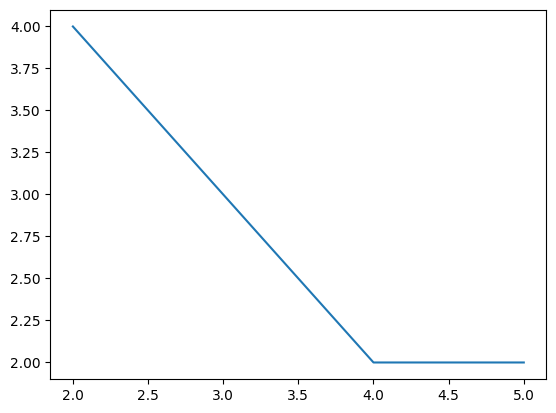

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = [2,3,4,5]
y = [4,3,2,2]

plt.plot(x,y)

In [2]:
hw = pd.read_csv("testdata/hw.csv", index_col=0)
hw.head()

,"Height(Inches)""","""Weight(Pounds)"""
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


<Axes: xlabel='Index'>

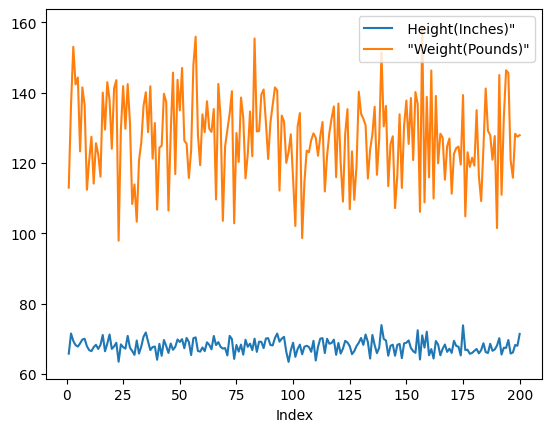

In [3]:
hw.plot()

In [6]:
# Common Plot Types
# Scatter
# Line 
# Bar
# Histogram 
# Area

# df = read_csv( “myfile.csv”, names = [“City, Population”], index_col = 0, usecols = [0, 2])
#  Names can be used to specify a list of column names when no header row is present
#  Index_col specifies the column to use as the row label of the DataFrame
#  Usecols specifies the columns in the dataset that you would like to import

house = pd.read_csv("testdata/homes.csv")
house.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


<Axes: >

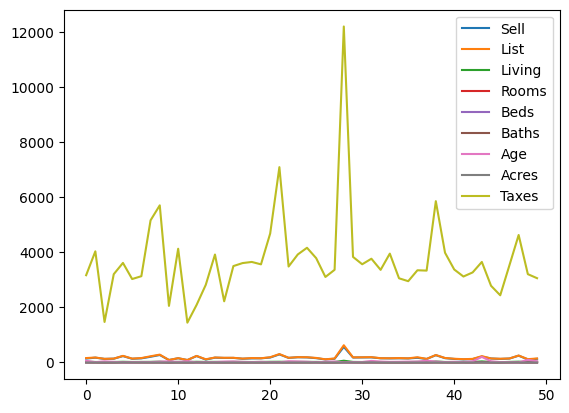

In [7]:
house.plot()

<Axes: xlabel='List'>

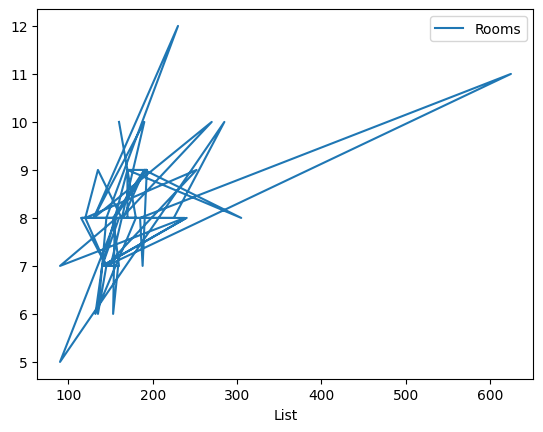

In [8]:
house.plot(x="List", y='Rooms')

<Axes: xlabel='List'>

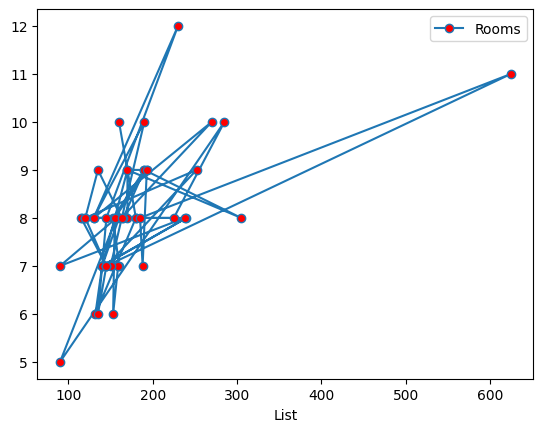

In [9]:
## unable to make sense, Lets add markers
house.plot(x="List", y='Rooms', marker='o', markerfacecolor='red')

<Axes: xlabel='List', ylabel='Rooms'>

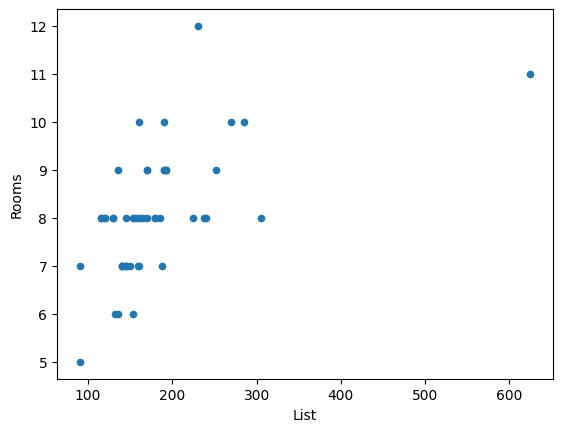

In [11]:
# Scatter plot 
house.plot(x="List", y='Rooms', kind='scatter')

<Axes: xlabel='Age', ylabel='List'>

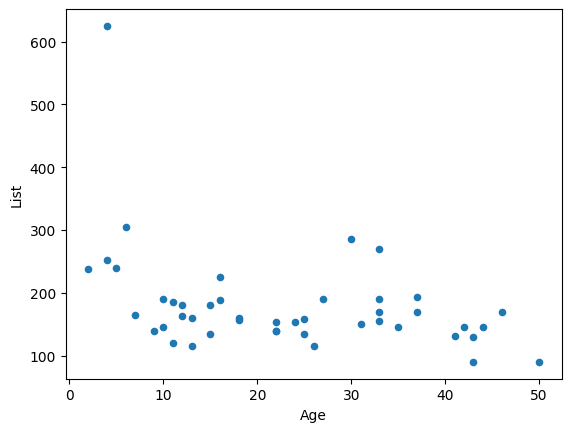

In [12]:
# Filter data and plot
house[house["Age"]<=50].plot(kind='scatter', x='Age', y='List')

<Axes: xlabel='Age', ylabel='List'>

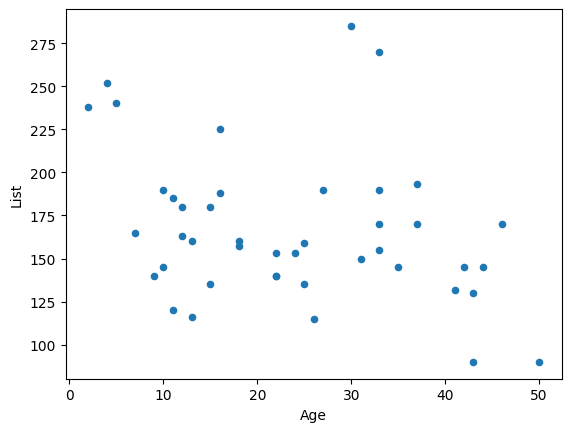

In [19]:
houseplotdata = house[house["Age"]<=50]
houseplotdata = houseplotdata[houseplotdata["List"]<=300]
houseplotdata.plot(kind="scatter", x="Age", y="List")

In [23]:
cities = pd.read_csv("testdata/cities.csv")
cities_2019 = cities[cities["Year"]==2019]
cities_2019.head()

,City,Year,Population
4,Charlotte,2019,885708
9,San Francisco,2019,881549
14,Indianapolis,2019,876384
19,Seattle,2019,753675
24,Denver,2019,727211


<Axes: xlabel='City'>

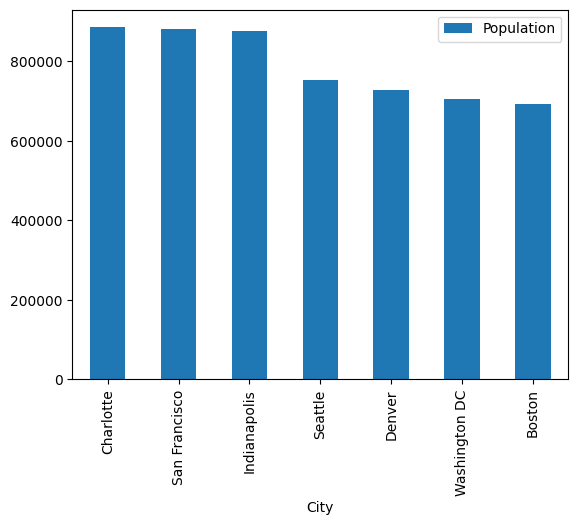

In [24]:
cities_2019.plot(kind="bar", x='City', y='Population')

<Axes: title={'center': '2019 Population'}, ylabel='City'>

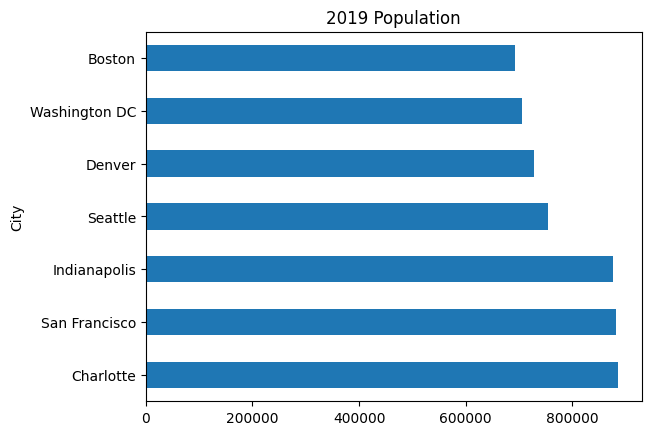

In [27]:
# Making adjustment to remove legend, add title and making it barh
cities_2019.plot(kind="barh", x='City', y='Population', title="2019 Population", legend='')

In [28]:
houseplotdata.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613
5,135,140,18,7,4,3,9,0.57,3028


<Axes: title={'center': 'Acreage Distribution'}, ylabel='Frequency'>

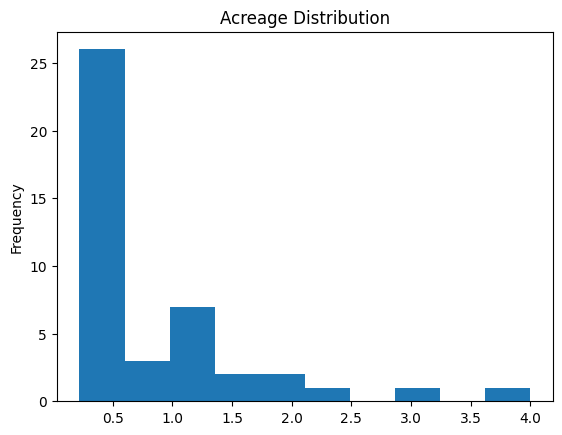

In [30]:
houseplotdata['Acres'].plot(kind='hist', title="Acreage Distribution")

In [31]:
enrollment = pd.read_csv("testdata/enrollment.csv")
enrollment.head()

,Year,Class,Enrollment
0,2018,Freshman,1500
1,2018,Sophomore,1400
2,2018,Junior,1300
3,2018,Senior,1200
4,2019,Freshman,1600


<Axes: xlabel='Year'>

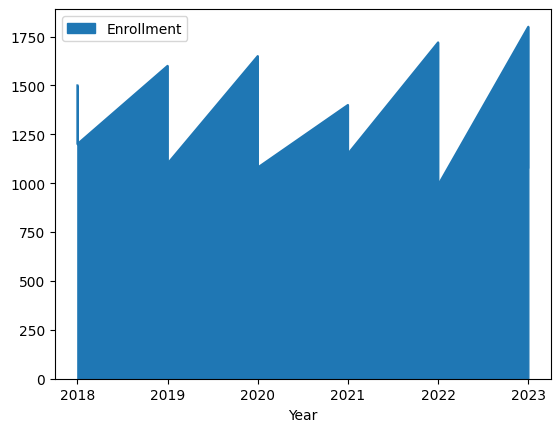

In [32]:
enrollment.plot(kind="area", x="Year")

In [33]:
pivot_enrolled = enrollment.pivot(index="Year", columns="Class", values="Enrollment")
pivot_enrolled.head()

Class,Freshman,Junior,Senior,Sophomore
Year,,,,
2018,1500,1300,1200,1400
2019,1600,1200,1100,1500
2020,1650,1100,1080,1320
2021,1400,1100,1150,1390
2022,1720,1080,990,1300


<Axes: xlabel='Year'>

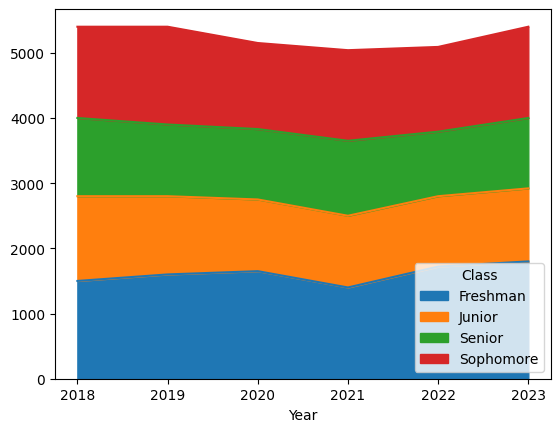

In [34]:
pivot_enrolled.plot(kind='area')

<Axes: xlabel='Year'>

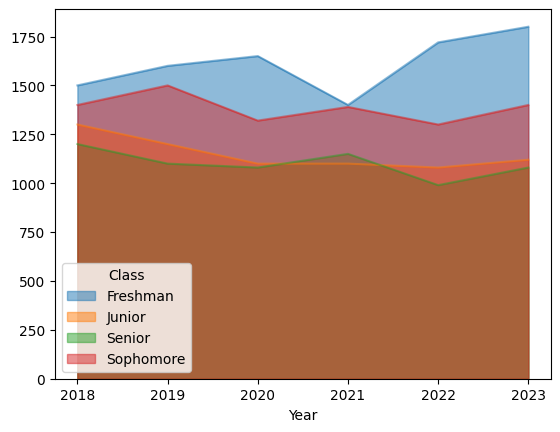

In [35]:
# to find ablsolute 
pivot_enrolled.plot(kind='area', stacked=False)